## Brain Tumor Detection

In [1]:
# import essential libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from keras import models, layers

In [2]:
# specified the dataset directory
data_directory = 'C:\\Users\\65814\\OneDrive\\Projects\\keras_learning\\dataset\\brain_tumor_dataset'

In [3]:
# define a function to load the dataset from a given directory
def get_dataset(data_directory):
    img_cont = []
    label_cont = []
    for folder in os.listdir(data_directory):
        class_folder = os.path.join(data_directory, folder)
        for file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, file)
            if img_path.lower().endswith(('png','jpg','jpeg')):
                img = Image.open(img_path).convert('RGB')
                img = img.resize((128,128))
                img_cont.append(np.array(img))
                label_cont.append(folder)
    return np.array(img_cont), np.array(label_cont)

In [4]:
# load the images and image label from the directory
X, y = get_dataset(data_directory)

In [5]:
# image label
class_label = np.unique(y)

print(class_label)

['no' 'yes']


In [6]:
# check the number of images and the label
print('Total number of images in the dataset:', len(X))
print('Total number of labels corresponding to the image in the dataset:', len(y))

Total number of images in the dataset: 253
Total number of labels corresponding to the image in the dataset: 253


In [7]:
# define a function to plot an image from the dataset
def plot_image(X, y, index):
    plt.figure(figsize=(4,6))
    plt.imshow(X[index])
    plt.title('Label: {}'.format(y[index]))
    plt.axis('off')
    plt.show()

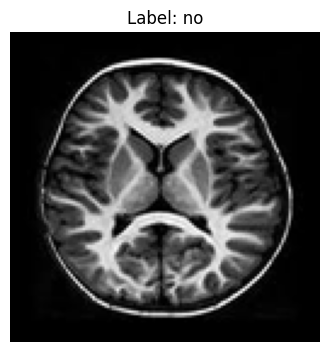

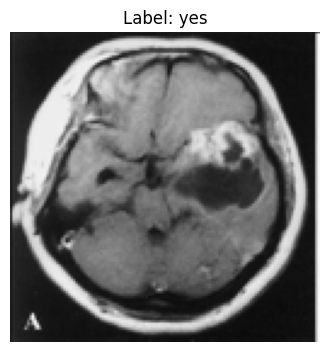

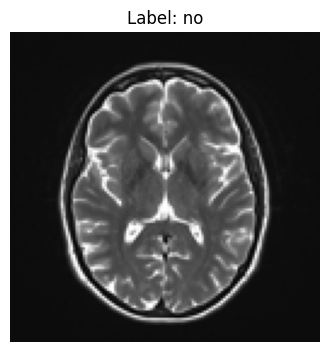

In [8]:
# view some image examples
plot_image(X, y, 5)
plot_image(X, y, 122)
plot_image(X, y, 96)

In [9]:
# define a function randomly generate a series of numbers
import random

def generate_numbers(x, max_num):
    cont = []
    while len(cont) != x: 
        num = random.randint(0,max_num-1)
        if num not in cont:
            cont.append(num)
    return cont

In [10]:
# split the dataset into training, test and validation sets
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=122)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.1, shuffle=True, stratify=ytrain, random_state=122)

print('Number of images in training set:', len(Xtrain))
print('Number of images in test set:', len(Xtest))
print('Number of images in validation set:', len(Xval))

Number of images in training set: 181
Number of images in test set: 51
Number of images in validation set: 21


In [11]:
# encoding the label in numerical format
from sklearn.preprocessing import LabelEncoder

# instantiation  a LabelEncoder()
label_encoder = LabelEncoder()

# encode the label for train, test and validation datasets
ytrain_encoded = label_encoder.fit_transform(ytrain)
ytest_encoded = label_encoder.transform(ytest)
yval_encoded = label_encoder.transform(yval)

In [12]:
# normalize the image data
Xtrain_normalized = Xtrain.astype('float32')/255.0
Xtest_normalized = Xtest.astype('float32')/255.0
Xval_normalized = Xval.astype('float32')/255.0

In [13]:
# set the cnn network architecture
cnn = models.Sequential()

cnn.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.Activation('relu'))
cnn.add(layers.MaxPooling2D(pool_size=(2,2)))

cnn.add(layers.Conv2D(filters=64, kernel_size=(3,3)))
cnn.add(layers.Dropout(0.3))
cnn.add(layers.Activation('relu'))
cnn.add(layers.MaxPooling2D(pool_size=(2,2)))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(units=128))
cnn.add(layers.BatchNormalization())
cnn.add(layers.Activation('relu'))
cnn.add(layers.Dense(units=1, activation='sigmoid'))

In [14]:
# compile the model (configure the learning process)
cnn.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy'])

In [15]:
# train the neural network with the training data
history = cnn.fit(Xtrain_normalized, ytrain_encoded, epochs=10, validation_data=(Xval_normalized, yval_encoded))

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.6062 - loss: 1.0770 - val_accuracy: 0.8095 - val_loss: 0.3747
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.8447 - loss: 0.3395 - val_accuracy: 0.3810 - val_loss: 0.6787
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 275ms/step - accuracy: 0.8935 - loss: 0.2716 - val_accuracy: 0.6190 - val_loss: 0.6387
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 0.9847 - loss: 0.1622 - val_accuracy: 0.7143 - val_loss: 0.4895
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 0.9779 - loss: 0.1174 - val_accuracy: 0.7143 - val_loss: 0.4562
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - accuracy: 1.0000 - loss: 0.0603 - val_accuracy: 0.6190 - val_loss: 0.5080
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - accuracy: 1.0000 - loss: 0.0434 - val_accuracy: 0.6190 - val_loss: 0.5170
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - accuracy: 1.0000 - loss: 0.0326 - val_accuracy: 0.6190 - val_loss:

In [16]:
# extract the accuracy and loss of the model during training process
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']

In [17]:
# accuracy of model on test dataset
res = cnn.evaluate(Xtest_normalized, ytest_encoded)
print('Accuracy of model on test dataset:', round(res[1]*100,2),'%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6031 - loss: 0.7189
Accuracy of model on test dataset: 60.78 %


In [18]:
# define a function to visualize the model accuracy and loss during training process
def plot_result(train_accuracy, validation_accuracy, train_loss, validation_loss):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(validation_accuracy, label='Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title('Model Accuracy')
    plt.legend(loc='upper left')
    plt.subplot(1,2,2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(validation_loss, label='Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('Model Loss')
    plt.legend(loc='upper left')
    plt.show()

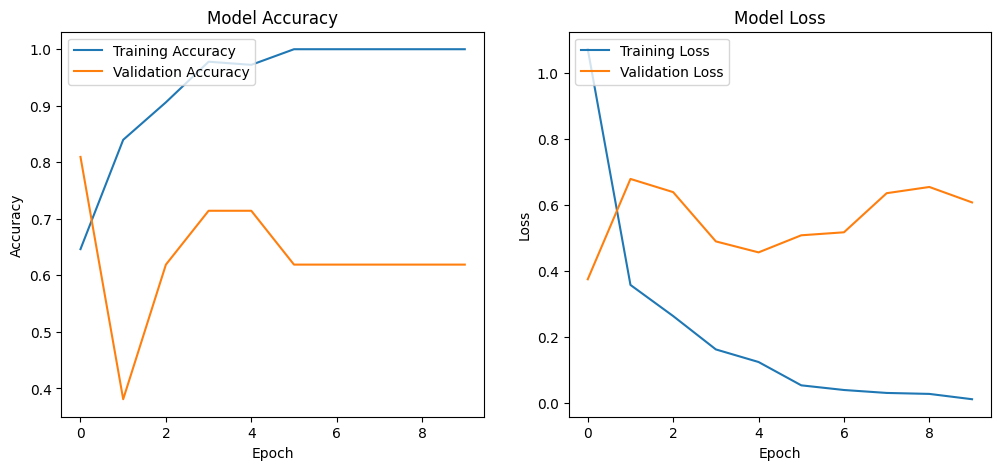

In [19]:
# plot the accuracy and loss graph
plot_result(train_accuracy, validation_accuracy, train_loss, validation_loss)

#### Transfer Learning

In [20]:
# load a pre-trained model
base_model = tf.keras.applications.VGG16(
    include_top = False,
    weights = 'imagenet',
    input_shape = (128,128,3)
)

In [21]:
# freeze the layers in the base model
base_model.trainable = False

In [22]:
# create a new model on top of the base model
cnn_tf = models.Sequential()

cnn_tf.add(base_model)
cnn_tf.add(layers.Flatten())
cnn_tf.add(layers.Dense(units=256, activation='relu'))
cnn_tf.add(layers.Dropout(0.5))
cnn_tf.add(layers.Dense(units=1, activation='sigmoid'))

In [23]:
# compile the model (configure the model learning process)
cnn_tf.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [24]:
# train the model with the training data
history_tf = cnn_tf.fit(Xtrain_normalized, ytrain_encoded, epochs=10, validation_data=(Xval_normalized, yval_encoded))

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5397 - loss: 1.0753 - val_accuracy: 0.6190 - val_loss: 0.8449
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6502 - loss: 0.9280 - val_accuracy: 0.9524 - val_loss: 0.1334
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8189 - loss: 0.4125 - val_accuracy: 0.9524 - val_loss: 0.1980
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8322 - loss: 0.4676 - val_accuracy: 0.9524 - val_loss: 0.1786
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8258 - loss: 0.4043 - val_accuracy: 0.9524 - val_loss: 0.1795
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9226 - loss: 0.2174 - val_accuracy: 0.9048 - val_loss: 0.1460
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9361 - loss: 0.1786 - val_accuracy: 0.9524 - val_loss: 0.1509
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9538 - loss: 0.1995 - val_accuracy: 0.9048 - val_loss: 0.1317
Epoch 9/10
6/6 ━

In [25]:
# extract the accuracy and loss of the model during training process
tf_training_accuracy = history_tf.history['accuracy']
tf_training_loss = history_tf.history['loss']
tf_validation_accuracy = history_tf.history['val_accuracy']
tf_validation_loss = history_tf.history['val_loss']

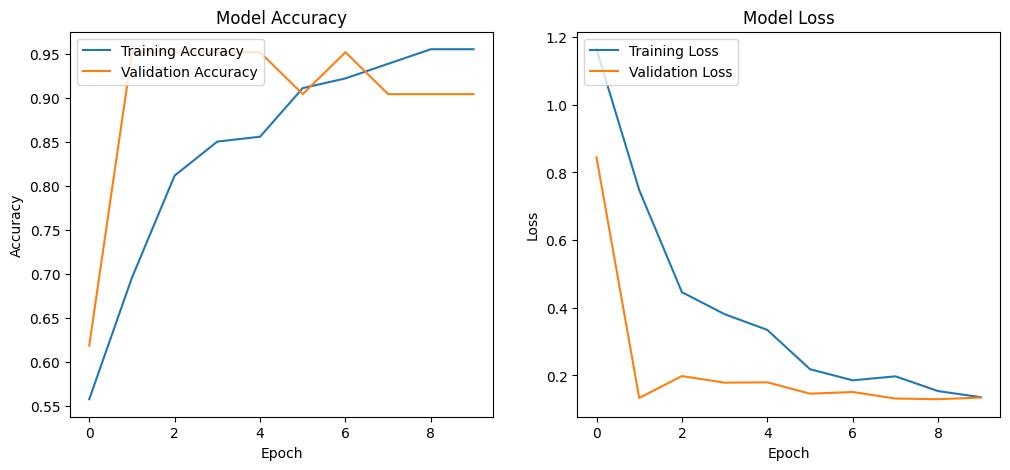

In [26]:
# plot the accuracy and loss graph
plot_result(tf_training_accuracy, tf_validation_accuracy, tf_training_loss, tf_validation_loss)

In [27]:
# accuracy of the model on test dataset
res_tf = cnn_tf.evaluate(Xtest_normalized, ytest_encoded)
print('Accuracy of model on test dataset', round(res_tf[1]*100,2),'%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 766ms/step - accuracy: 0.8564 - loss: 0.3288
Accuracy of model on test dataset 86.27 %


In [28]:
# predicted classes of test dataset
ypred_proba = cnn_tf.predict(Xtest_normalized)
ypred = (ypred_proba > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


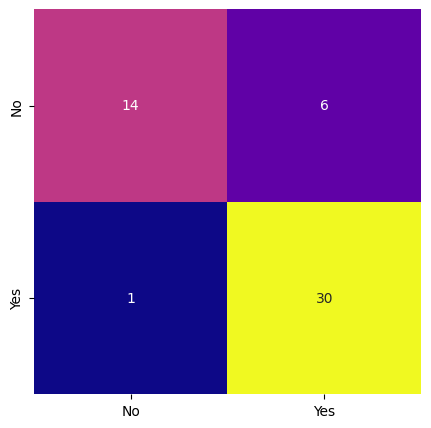

In [29]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest_encoded, ypred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, cmap='plasma', cbar=False, annot=True, fmt='.2g', xticklabels=['No', 'Yes'], yticklabels=['No','Yes'])
plt.show()

In [30]:
# classification report
from sklearn.metrics import classification_report

report = classification_report(ytest_encoded, ypred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.83      0.97      0.90        31

    accuracy                           0.86        51
   macro avg       0.88      0.83      0.85        51
weighted avg       0.87      0.86      0.86        51



In [31]:
# define a function to inspect the prediction of the model
def display_prediction(dataset, label):
    unique_num = generate_numbers(16,len(dataset))

    fig, axs = plt.subplots(4, 4, figsize=(12, 12))
    
    for index, axs_index in zip(unique_num, np.ndindex(axs.shape)):
        axs[axs_index].imshow(dataset[index], cmap='gray')
        axs[axs_index].set_title('True: {}, \n Prediction: {}'.format([label[index]], class_label[ypred.reshape(-1,)[index]]))
        axs[axs_index].axis('off')

        plt.tight_layout()

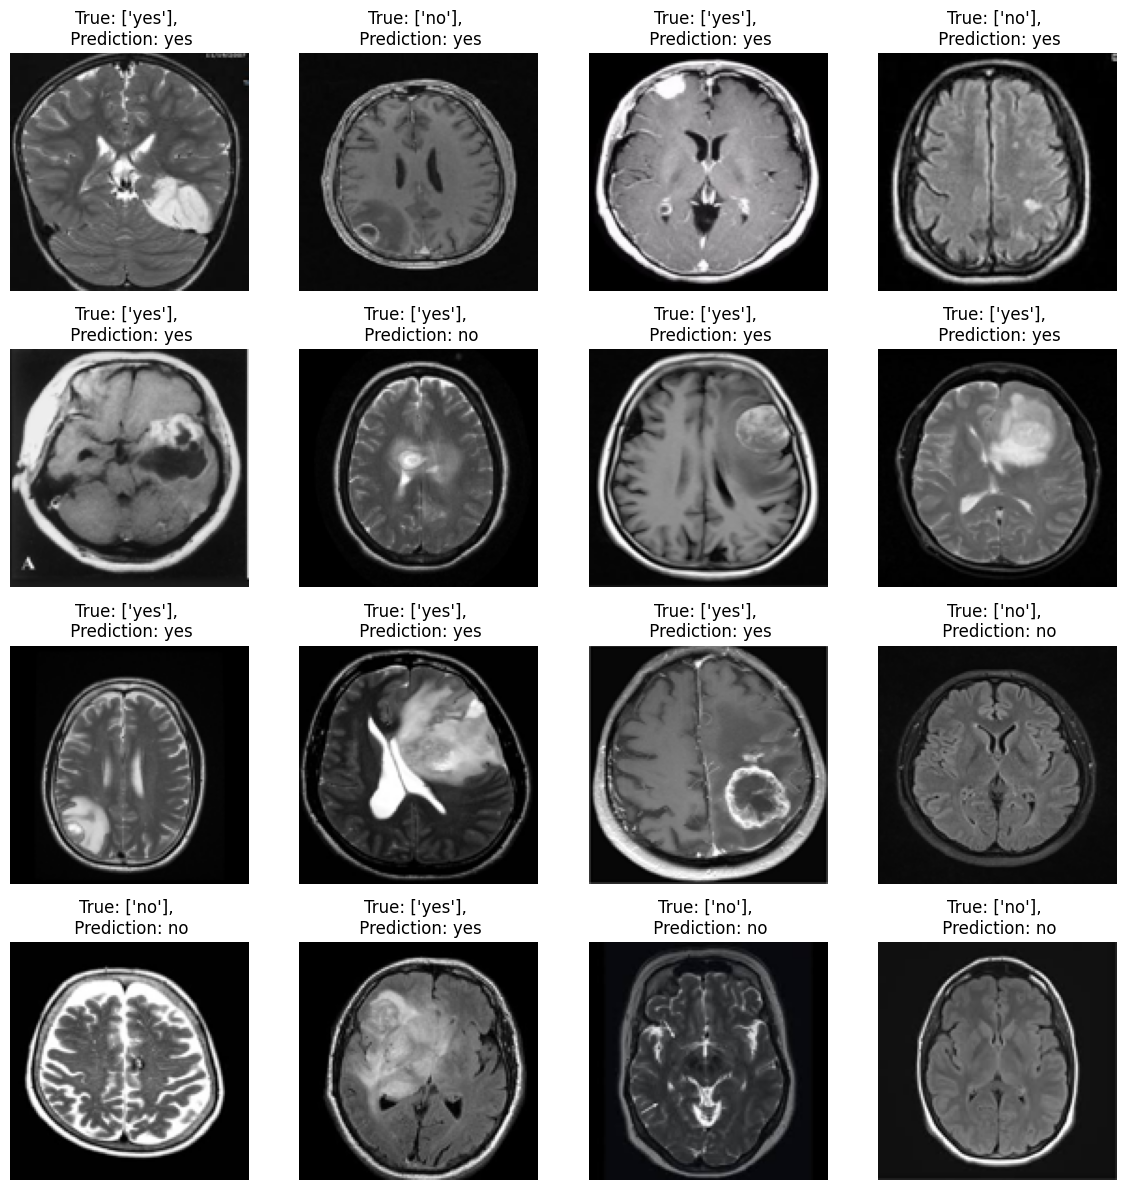

In [32]:
# visualize the predictions
display_prediction(Xtest, ytest)